In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('data.csv')

In [23]:
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


In [24]:
id_features=[features for features in df.columns if 'id' in features and features!='sliding_tackle']
id_features

['player_fifa_api_id', 'player_api_id']

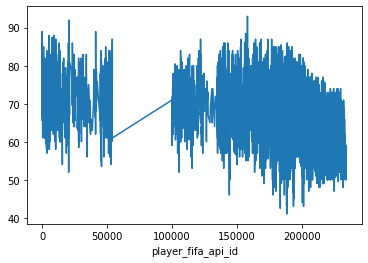

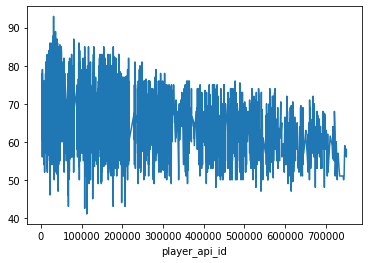

In [25]:
for features in id_features:
    df.groupby(features)['overall_rating'].median().plot()
    plt.show()

In [28]:
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


In [29]:
df.columns = df.columns.str.replace(' ','')

In [30]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
categorical_features

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

In [31]:
for features in categorical_features:
    df[features] = df[features].str.replace(' ','')

In [32]:
for features in categorical_features:
    if features!='date':
        print("Unique values in",features,"are",df[features].unique())

Unique values in preferred_foot are ['right' 'left' nan]
Unique values in attacking_work_rate are ['medium' 'high' nan 'low' 'None' 'le' 'norm' 'stoc' 'y']
Unique values in defensive_work_rate are ['medium' 'high' 'low' '_0' nan '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']


In [33]:
df['date']

0         2016-02-18
1         2015-11-19
2         2015-09-21
3         2015-03-20
4         2007-02-22
             ...    
183973    2009-08-30
183974    2009-02-22
183975    2008-08-30
183976    2007-08-30
183977    2007-02-22
Name: date, Length: 183978, dtype: object

In [34]:
df['year']=df['date'].str.slice(0,4)

In [35]:
df

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,2009-08-30,83.0,85.0,right,medium,low,84.0,77.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009
183974,102359,39902,2009-02-22,78.0,80.0,right,medium,low,74.0,76.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2009
183975,102359,39902,2008-08-30,77.0,80.0,right,medium,low,74.0,71.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008
183976,102359,39902,2007-08-30,78.0,81.0,right,medium,low,74.0,64.0,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007


In [36]:
month=df['date'].str.slice(5,7)
day=df['date'].str.slice(8,)
df.drop('day',axis=1,inplace=True)

KeyError: "['day'] not found in axis"

<AxesSubplot:xlabel='year'>

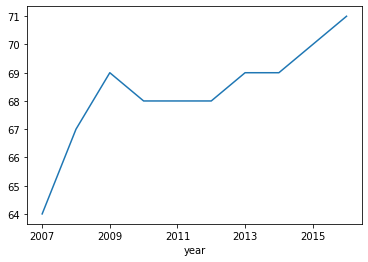

In [41]:
df.groupby('year')['overall_rating'].median().plot()

<AxesSubplot:xlabel='date'>

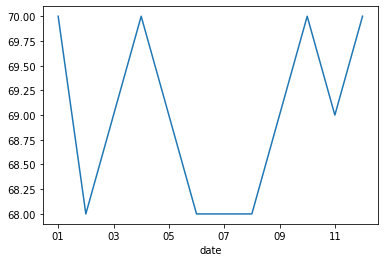

In [42]:
df.groupby(month)['overall_rating'].median().plot()

<AxesSubplot:xlabel='date'>

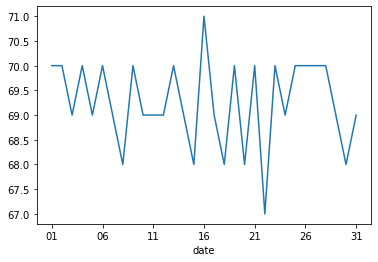

In [43]:
df.groupby(day)['overall_rating'].median().plot()

In [44]:
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


In [45]:
df.to_csv('data.csv',index=None)